# Archivo EDA

En este archivo, se aborda el análisis exploratorio de los datos, donde nos sumerigmos a comprender cada una de las columnas referidas en la información, los valores que contienen, qué relaciones pueden existir entre ellas, además, se buscan patrones que puedan servir como insights para la toma de decisiones en función de cumplir los KPI propuestos. 

In [42]:
# Se importan las liberías necesarias para realizar el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

In [16]:
# Se carga el archivo previamente trabajado y limpio de homicidios
df_Homicidios = pd.read_csv('..\..\DataSets Limpios\Homicidios_Limpio.csv')

Comenzamos nuestro análisis desde una visión general, sabiendo que tenemos un universo de 696 homicidios, con un total de 761 victimas desde el 2016 al 2021

In [17]:
print("El total de homicidios del 2016 al 2021 son: ", df_Homicidios['Id_Homicidio'].nunique())
print("El total de victimas que perdieron la vida del año 2016 al 2021 son: ", df_Homicidios['Nro_Victimas'].sum())

El total de homicidios del 2016 al 2021 son:  696
El total de victimas que perdieron la vida del año 2016 al 2021 son:  761


In [18]:
# Se procede a obtener el número y porcentaje de valores de nulos en cada una de las columnas
# Esto con la intención de saber cuáles pueden ser las columnas más confiables para nuestro análisis

null_count = df_Homicidios.isnull().sum() # Se obtiene el listado de valores nulos por columna
null_percentage = (df_Homicidios.isnull().mean()) * 100 # Se obtiene el porcentaje correspondiente a dicha columna

# Se crea un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

# Con esto, notamos que las columnas de altura y cruce no resultan del todo eficientes para realizar análisis
# También, se toma en consideración que las columnas de edad y fecha de fallecimiento, podrían contar un porcentaje de valores nulos considerable

                       Nulos  Porcentaje
Id_Homicidio               0    0.000000
Nro_Victimas               0    0.000000
Fecha                      0    0.000000
Hora_Hecho                 1    0.139470
Hora                       1    0.139470
Lugar_Hecho                1    0.139470
Tipo_Calle                 0    0.000000
Calle                      1    0.139470
Altura                   584   81.450488
Cruce                    177   24.686192
Direccion_Normalizada      9    1.255230
Comuna                     0    0.000000
XY (CABA)                  0    0.000000
Longitud                   0    0.000000
Latitud                    0    0.000000
Participantes              0    0.000000
Vehiculo_Victima           9    1.255230
Vehiculo_Acusado          23    3.207810
Rol                       11    1.534170
Sexo                       6    0.836820
Edad                      53    7.391911
Fecha_Fallecimiento       68    9.483961


In [19]:
# Se procede a agregar columnas por año, por mes y por semestre que nos servirán para poder generar gráficas 
# y mostrar el comportamiento de los datos

# Se convierte la columna de Fecha en una collumna de tipo datetime
df_Homicidios['Fecha'] = pd.to_datetime(df_Homicidios['Fecha'])
# Se crean nuevas columnas: year, month, quarter, semester
df_Homicidios['Año'] = df_Homicidios['Fecha'].dt.year
df_Homicidios['Mes'] = df_Homicidios['Fecha'].dt.month
df_Homicidios['Trimestre'] = df_Homicidios['Fecha'].dt.quarter
df_Homicidios['Semestre'] = df_Homicidios['Fecha'].dt.month.apply(lambda x: 1 if x <= 6 else 2)

In [21]:
df_Homicidios.head()

,Id_Homicidio,Nro_Victimas,Fecha,Hora_Hecho,Hora,Lugar_Hecho,Tipo_Calle,Calle,Altura,Cruce,...,Vehiculo_Victima,Vehiculo_Acusado,Rol,Sexo,Edad,Fecha_Fallecimiento,Año,Mes,Trimestre,Semestre
0,2016-0001,1,2016-01-01,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00,2016,1,1,1
1,2016-0002,1,2016-01-02,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,...,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00,2016,1,1,1
2,2016-0003,1,2016-01-03,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,...,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00,2016,1,1,1
3,2016-0004,1,2016-01-10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",...,MOTO,NaN,CONDUCTOR,MASCULINO,18.0,NaN,2016,1,1,1
4,2016-0005,1,2016-01-21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.",...,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00,2016,1,1,1


# Gráficas e información estadística

Comenzamos desde una perspectiva general, mostrando el comportamiento a través del tiempo sobre el número de homicidios ocurridos, además, se muestra la cantidad de victimas totales en el periodo analizado

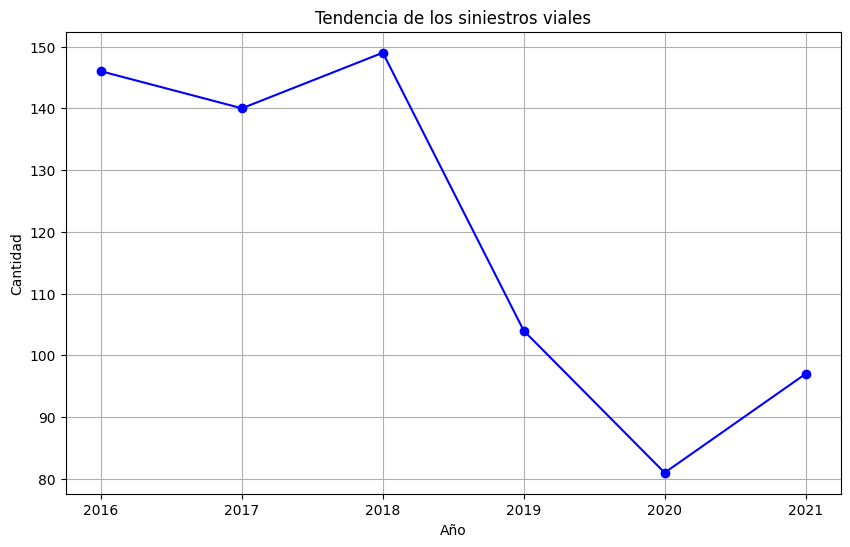

In [24]:
# Se calcula el número de homicidios por año
Homicidios_Por_Anio = df_Homicidios.groupby(df_Homicidios['Año']).size()

# Se grafica el total de homicidios por año
plt.figure(figsize=(10, 6))
plt.plot(Homicidios_Por_Anio.index, Homicidios_Por_Anio, marker='o', linestyle='-', color='b')
plt.title('Tendencia de víctimas mortales')
plt.xlabel('Año')
plt.ylabel('Total Siniestros')
plt.grid(True)
plt.show()

La gráfica nos muestra como en el año 2020 se tiene el menor número de siniestros viales en la historia de este análisis, tentativamente podríamos atribuir este resultado a la pandemia del Covid-19, donde por el bien de la población se nos pidio no salir de casa y procurar el no contacto con otras personas, por lo que podríamos estimar que el número de personas y automóviles que se desplazaban por la ciudad en esas fechas, era mucho menor al promedio de años atrás

Posteriormente, comenzamos a hacer un análisis más profundo de la información, comenzando por las comunas de CABA, buscando agrupar estos siniestros por comuna con la intención de visualizar cuáles son las comunas con mayores problemas viales.

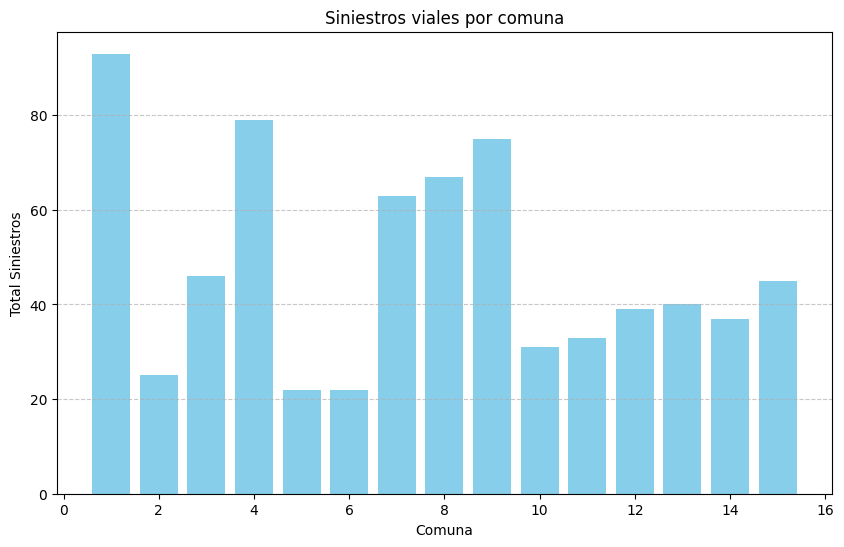

In [29]:
# Se calcula el número de homicidios por comuna
Homicidios_Por_Comuna = df_Homicidios.groupby(df_Homicidios['Comuna']).size()

# Se grafica la información obtenida
plt.figure(figsize=(10, 6))
plt.bar(Homicidios_Por_Comuna.index, Homicidios_Por_Comuna, color='skyblue')
plt.title('Siniestros viales por comuna')
plt.xlabel('Comuna')
plt.ylabel('Total Siniestros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Con estos datos, podemos notar que las comunas a las cuáles se les tiene que poner mayor atención y esfuerzo son la comuna 1, 4 y 9, ya que son las comunas que más siniestros viales presentan en el periodo analizado, será importante analizar con mayor detalle cada una de ellas en el futuro, con ls intención de reducir este número con el paso del tiempo

Ahora, nos enfocamos en saber el número de accidentes que ocurren según el tipo de calle en el que se hayan presentado

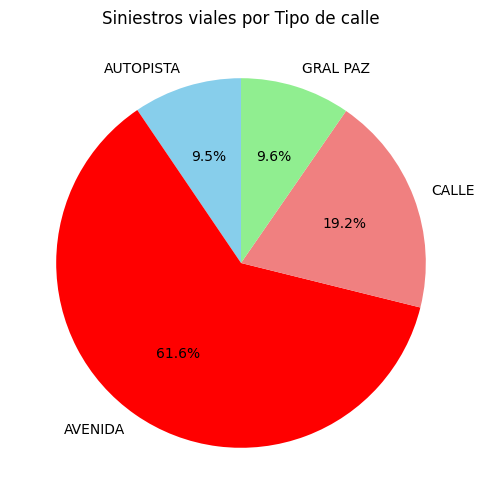

In [36]:
# Se calcula el número de homicidios por calle
Homicidios_Por_Calle = df_Homicidios.groupby(df_Homicidios['Tipo_Calle']).size()

# Se grafica la información obtenida
plt.figure(figsize=(10, 6))
plt.pie(Homicidios_Por_Calle, labels=Homicidios_Por_Calle.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red', 'lightcoral', 'lightgreen'])
plt.title('Siniestros viales por Tipo de calle')
plt.show()

Las avenidas, son el tipo de calle más preocupante, ya que presentan más de 400 siniestros viales, en términos de porcentaje, resulta mayor al 60% de todos los siniestros.

Esta información nos puede dar una visión de posibles análisis futuros a realizar, por ejemplo, sabiendo que las comunas 1, 4 y 9 son las más accidentadas, podríamos profundizar en las avenidas con mayor cantidad de incidentes en dichas comunas, siendo así, aquellas en las que se tendría que tomar acción para reducir el número de siniestros general

Ahora, buscamos información relevante en el rol que tomaron cada una de las víctimas de estos siniestros

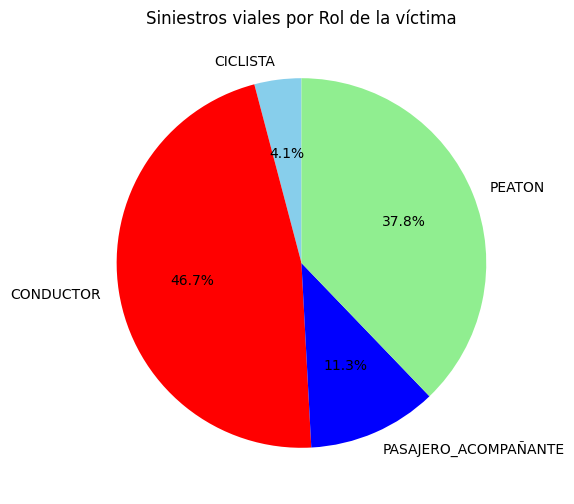

In [37]:
# Se calcula el número de homicidios por rol
Homicidios_Por_Rol = df_Homicidios.groupby(df_Homicidios['Rol']).size()

# Se grafica la información obtenida
plt.figure(figsize=(10, 6))
plt.pie(Homicidios_Por_Rol, labels=Homicidios_Por_Rol.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red', 'blue', 'lightgreen'])
plt.title('Siniestros viales por Rol de la víctima')
plt.show()

De acuerdo a la gráfica anterior, podemos notar que el rol de conductor y peatón son los que más sufren los siniestros viales, con esos datos, podríamos buscar a futuro alguna relación que nos permita tomar acción sobre algún tipo de educación víal para los peatones y conductores.

In [33]:
# Al revisar con mayor detalle la columna de participantes, nos vemos en la necesidad de corregir un error de escritura
# Se sustituye el valor PEATON_MOTO-MOTO por PEATON-MOTO
df_Homicidios.loc[df_Homicidios['Participantes'] == "PEATON_MOTO-MOTO", 'Participantes'] = "PEATON-MOTO"

En la última parte de este análisis exploratorio y de descripción, veremos cómo es que se distribuyen los datos para los vehículos de víctimas y acusados

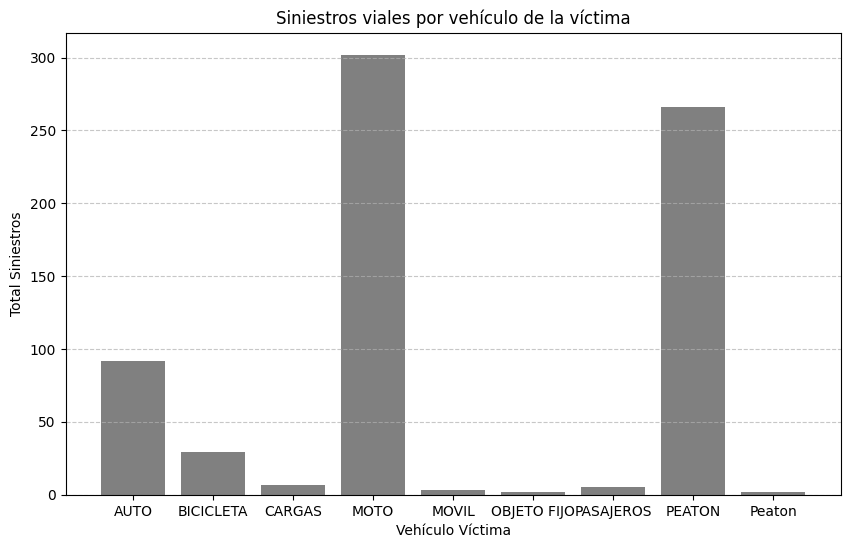

In [38]:
# Se calcula el número de homicidios por vehículo víctima
Homicidios_Por_VehículoVictima = df_Homicidios.groupby(df_Homicidios['Vehiculo_Victima']).size()

# Se grafica la información obtenida
plt.figure(figsize=(10, 6))
plt.bar(Homicidios_Por_VehículoVictima.index, Homicidios_Por_VehículoVictima, color='gray')
plt.title('Siniestros viales por vehículo de la víctima')
plt.xlabel('Vehículo Víctima')
plt.ylabel('Total Siniestros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

De acuerdo a lo observado, se puede notar que los principales afectados en estos siniestros son las motos, los peatones y el auto, siendo estas tres categorías las que mayor porcentaje representan dentro de los datos.

Por último, visualizamos la gráfica de los vehículos acusados

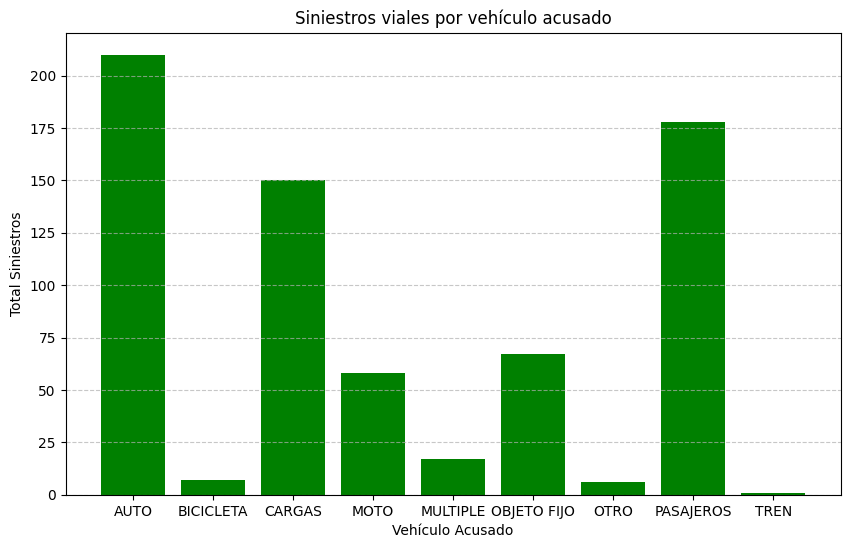

In [39]:
# Se calcula el número de homicidios por vehículo víctima
Homicidios_Por_VehículoAcusado = df_Homicidios.groupby(df_Homicidios['Vehiculo_Acusado']).size()

# Se grafica la información obtenida
plt.figure(figsize=(10, 6))
plt.bar(Homicidios_Por_VehículoAcusado.index, Homicidios_Por_VehículoAcusado, color='green')
plt.title('Siniestros viales por vehículo acusado')
plt.xlabel('Vehículo Acusado')
plt.ylabel('Total Siniestros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Con esta última gráfica, podemos tener una mayor visión sobre posibles análisis a futuro que se pueden realizar, aquí podemos observar que los principales acusados son los autos, pasajeros y los transportes de carga, eso nos podría permitir más adelante buscar algún patrón que nos permita identificar los relación entre vehículos acusados y víctimas, siendo así, una posible oportunidad de ejecutar acción para reducir estas principales categorías 

In [41]:
# Se guarda el nuevo dataframe 
df_Homicidios.to_csv('..\..\DataSets Limpios\Homicidios_Limpio.csv', index=False)

# Se crea una base de datos en mysql con el último archivo de csv generado

In [43]:
# Creamos las variables para la conexión
host = 'localhost'
user = 'root'
password = 'Eskape&21122402139'
base = 'bd_PI2_DA'

# Se utiliza la estructura Try Catch para controlar los posibles errores que resulten
try:
    # se carga el CSV en un DataFrame
    df = pd.read_csv('..\..\DataSets Limpios\Homicidios_Limpio.csv')
        
    # Se realiza la conexión a MySQL y crear la base de datos si no existe
    connection = mysql.connector.connect(
        host = host,
        user = user,
        password = password
    )
    # Se desarrolla el curso para ejecutar los comandos de mysql
    cursor = connection.cursor()
    cursor.execute(f"CREATE DATABASE IF NOT EXISTS {base}")
    cursor.close()
    connection.close()

    # Conectar a MySQL y crear la tabla si no existe
    engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:3306/{base}')
    connection = engine.connect()
    df.to_sql("homicidios", connection, index=False, if_exists='replace')
    connection.close()

    print("Base de datos y tabla creadas exitosamente.")
    
except pd.errors.EmptyDataError:
    raise ValueError("El archivo CSV está vacío.")
except mysql.connector.Error as err:
    print(f"Error al conectar a MySQL: {err}")
    raise
except Exception as e:
    print(f"Error inesperado: {e}")
    raise

Base de datos y tabla creadas exitosamente.


C:\Users\Windows10\AppData\Local\Temp\ipykernel_19460\2483603742.py:27: UserWarning: The provided table name 'Homicidios' is not found exactly as such in the database after writing the table, possibly due to case sensitivity issues. Consider using lower case table names.
  df.to_sql("Homicidios", connection, index=False, if_exists='replace')
